In [2]:
import pickle
with open("spreadsheet_boolean.pkl", "rb") as f:
    df = pickle.load(f)

C:\Users\aswan\AppData\Local\Temp\ipykernel_15772\2884683019.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)


In [3]:
df.head()

,date,symbol,streak_len,direction,occurrence,performance,vol,ma5_pos,ma10_pos,ma20_pos,...,ma100_pos,ma200_pos,ma5_neg,ma10_neg,ma20_neg,ma50_neg,ma100_neg,ma200_neg,next_day_actual,bin_name
0,2024-12-18,MIGI,4,-1,46,-1,1,0,0,0,...,0,0,-1,1,1,-1,-1,-1,0,4 -1 -1 -1 1 0 0 -1 -1
1,2024-12-18,PSNY,7,-1,8,1,1,0,0,0,...,0,0,1,1,-1,1,-1,-1,0,7 -1 1 1 1 0 0 1 -1
2,2024-12-18,AVNW,3,-1,536,1,1,0,0,1,...,0,0,-1,-1,0,1,1,1,0,3 -1 1 1 1 0 0 -1 1
3,2024-12-18,ANIP,3,-1,334,1,1,0,0,0,...,0,0,1,-1,-1,-1,1,1,0,3 -1 1 1 1 0 0 1 1
4,2024-12-18,GOODO,5,-1,10,1,-1,0,0,0,...,0,1,1,-1,1,-1,-1,0,0,5 -1 1 1 -1 0 1 1 0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.set_index('date',inplace=True)

In [6]:
# removing all the 0 values (indicating no change) from next_day_actual
df = df[df['next_day_actual'] != 0]

In [7]:
def convert_negative_to_zero(df, column_name):
    df[column_name] = df[column_name].replace(-1, 0)
    return df
df = convert_negative_to_zero(df, 'next_day_actual')

In [8]:
df['next_day_actual'].unique()

array([0, 1])

In [9]:
df.dtypes

symbol             object
streak_len         object
direction           int64
occurrence         object
performance         int64
vol                 int64
ma5_pos             int64
ma10_pos            int64
ma20_pos            int64
ma50_pos            int64
ma100_pos           int64
ma200_pos           int64
ma5_neg             int64
ma10_neg            int64
ma20_neg            int64
ma50_neg            int64
ma100_neg           int64
ma200_neg           int64
next_day_actual     int64
bin_name           object
dtype: object

In [10]:
df['streak_len'] = df['streak_len'].astype(int)
df.drop(columns=['symbol','bin_name','occurrence'],inplace=True)
df.head()

,streak_len,direction,performance,vol,ma5_pos,ma10_pos,ma20_pos,ma50_pos,ma100_pos,ma200_pos,ma5_neg,ma10_neg,ma20_neg,ma50_neg,ma100_neg,ma200_neg,next_day_actual
date,,,,,,,,,,,,,,,,,
2024-12-17,3,1,-1,1,0,0,0,0,0,1,1,1,-1,1,-1,0,0
2024-12-17,6,-1,1,-1,0,0,0,0,0,0,1,-1,-1,-1,-1,1,0
2024-12-17,3,1,-1,1,-1,1,1,1,1,1,0,0,0,0,0,0,1
2024-12-17,3,1,-1,1,-1,0,0,0,0,0,0,1,-1,-1,1,1,1
2024-12-17,4,-1,1,-1,0,0,0,0,0,0,-1,1,1,1,-1,-1,0


In [11]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df['next_day_actual']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

### One-Hot Encoding

In [12]:
cols = x.columns.to_list()
cols

['streak_len',
 'direction',
 'performance',
 'vol',
 'ma5_pos',
 'ma10_pos',
 'ma20_pos',
 'ma50_pos',
 'ma100_pos',
 'ma200_pos',
 'ma5_neg',
 'ma10_neg',
 'ma20_neg',
 'ma50_neg',
 'ma100_neg',
 'ma200_neg']

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[cols])
encoded_cols = list(encoder.get_feature_names_out(cols)) # it retrieves the names of the new encoded features created by the OneHotEncoder and stores them in the list encoded_cols.

In [14]:
x_train[encoded_cols] = encoder.transform(x_train[cols])
x_test[encoded_cols] = encoder.transform(x_test[cols])

In [15]:
x_train.columns

Index(['streak_len', 'direction', 'performance', 'vol', 'ma5_pos', 'ma10_pos',
       'ma20_pos', 'ma50_pos', 'ma100_pos', 'ma200_pos', 'ma5_neg', 'ma10_neg',
       'ma20_neg', 'ma50_neg', 'ma100_neg', 'ma200_neg', 'streak_len_3',
       'streak_len_4', 'streak_len_5', 'streak_len_6', 'streak_len_7',
       'streak_len_8', 'streak_len_9', 'streak_len_10', 'streak_len_11',
       'streak_len_12', 'streak_len_13', 'streak_len_14', 'streak_len_15',
       'streak_len_16', 'streak_len_17', 'streak_len_18', 'streak_len_19',
       'streak_len_20', 'streak_len_21', 'streak_len_22', 'streak_len_23',
       'streak_len_24', 'streak_len_25', 'direction_-1', 'direction_1',
       'performance_-1', 'performance_0', 'performance_1', 'vol_-1', 'vol_0',
       'vol_1', 'ma5_pos_-1', 'ma5_pos_0', 'ma5_pos_1', 'ma10_pos_-1',
       'ma10_pos_0', 'ma10_pos_1', 'ma20_pos_-1', 'ma20_pos_0', 'ma20_pos_1',
       'ma50_pos_-1', 'ma50_pos_0', 'ma50_pos_1', 'ma100_pos_-1',
       'ma100_pos_0', 'ma100_pos_1

In [16]:
# removing the columns initial columns (columns which was use for making one hot encoded new columns)
x_train = x_train[encoded_cols]
x_test = x_test[encoded_cols]

In [17]:
x_train.columns

Index(['streak_len_3', 'streak_len_4', 'streak_len_5', 'streak_len_6',
       'streak_len_7', 'streak_len_8', 'streak_len_9', 'streak_len_10',
       'streak_len_11', 'streak_len_12', 'streak_len_13', 'streak_len_14',
       'streak_len_15', 'streak_len_16', 'streak_len_17', 'streak_len_18',
       'streak_len_19', 'streak_len_20', 'streak_len_21', 'streak_len_22',
       'streak_len_23', 'streak_len_24', 'streak_len_25', 'direction_-1',
       'direction_1', 'performance_-1', 'performance_0', 'performance_1',
       'vol_-1', 'vol_0', 'vol_1', 'ma5_pos_-1', 'ma5_pos_0', 'ma5_pos_1',
       'ma10_pos_-1', 'ma10_pos_0', 'ma10_pos_1', 'ma20_pos_-1', 'ma20_pos_0',
       'ma20_pos_1', 'ma50_pos_-1', 'ma50_pos_0', 'ma50_pos_1', 'ma100_pos_-1',
       'ma100_pos_0', 'ma100_pos_1', 'ma200_pos_-1', 'ma200_pos_0',
       'ma200_pos_1', 'ma5_neg_-1', 'ma5_neg_0', 'ma5_neg_1', 'ma10_neg_-1',
       'ma10_neg_0', 'ma10_neg_1', 'ma20_neg_-1', 'ma20_neg_0', 'ma20_neg_1',
       'ma50_neg_-1', 'ma50

### Converting encoded columns & target column to boolean

In [18]:
# Create DataFrames with the encoded data
x_train_encoded_df = pd.DataFrame(x_train, columns=encoded_cols, index=x_train.index)
x_test_encoded_df = pd.DataFrame(x_test, columns=encoded_cols, index=x_test.index)

In [19]:
x_train = x_train_encoded_df.astype(bool)
x_test = x_test_encoded_df.astype(bool)
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

### Training the model

In [20]:
from xgboost import XGBClassifier

In [21]:
model = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [22]:
%%time
model.fit(x_train, y_train)

CPU times: total: 20.2 s
Wall time: 2.8 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [23]:
preds = model.predict(x_train)
preds = preds.astype(bool)
preds

array([ True, False, False, ..., False,  True,  True], shape=(1672775,))

### Evaluation

Evaluating the predictions using RMSE(Root Mean Squared Error) error.

In [24]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b) ** 0.5  # Take the square root manually

rmse(preds, y_train)


0.6925855845220369

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_train, preds))
print(preds)

              precision    recall  f1-score   support

       False       0.52      0.54      0.53    838999
        True       0.52      0.50      0.51    833776

    accuracy                           0.52   1672775
   macro avg       0.52      0.52      0.52   1672775
weighted avg       0.52      0.52      0.52   1672775

[ True False False ... False  True  True]


### Visualization

We can visualize individual trees using `plot_tree` 

In [26]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

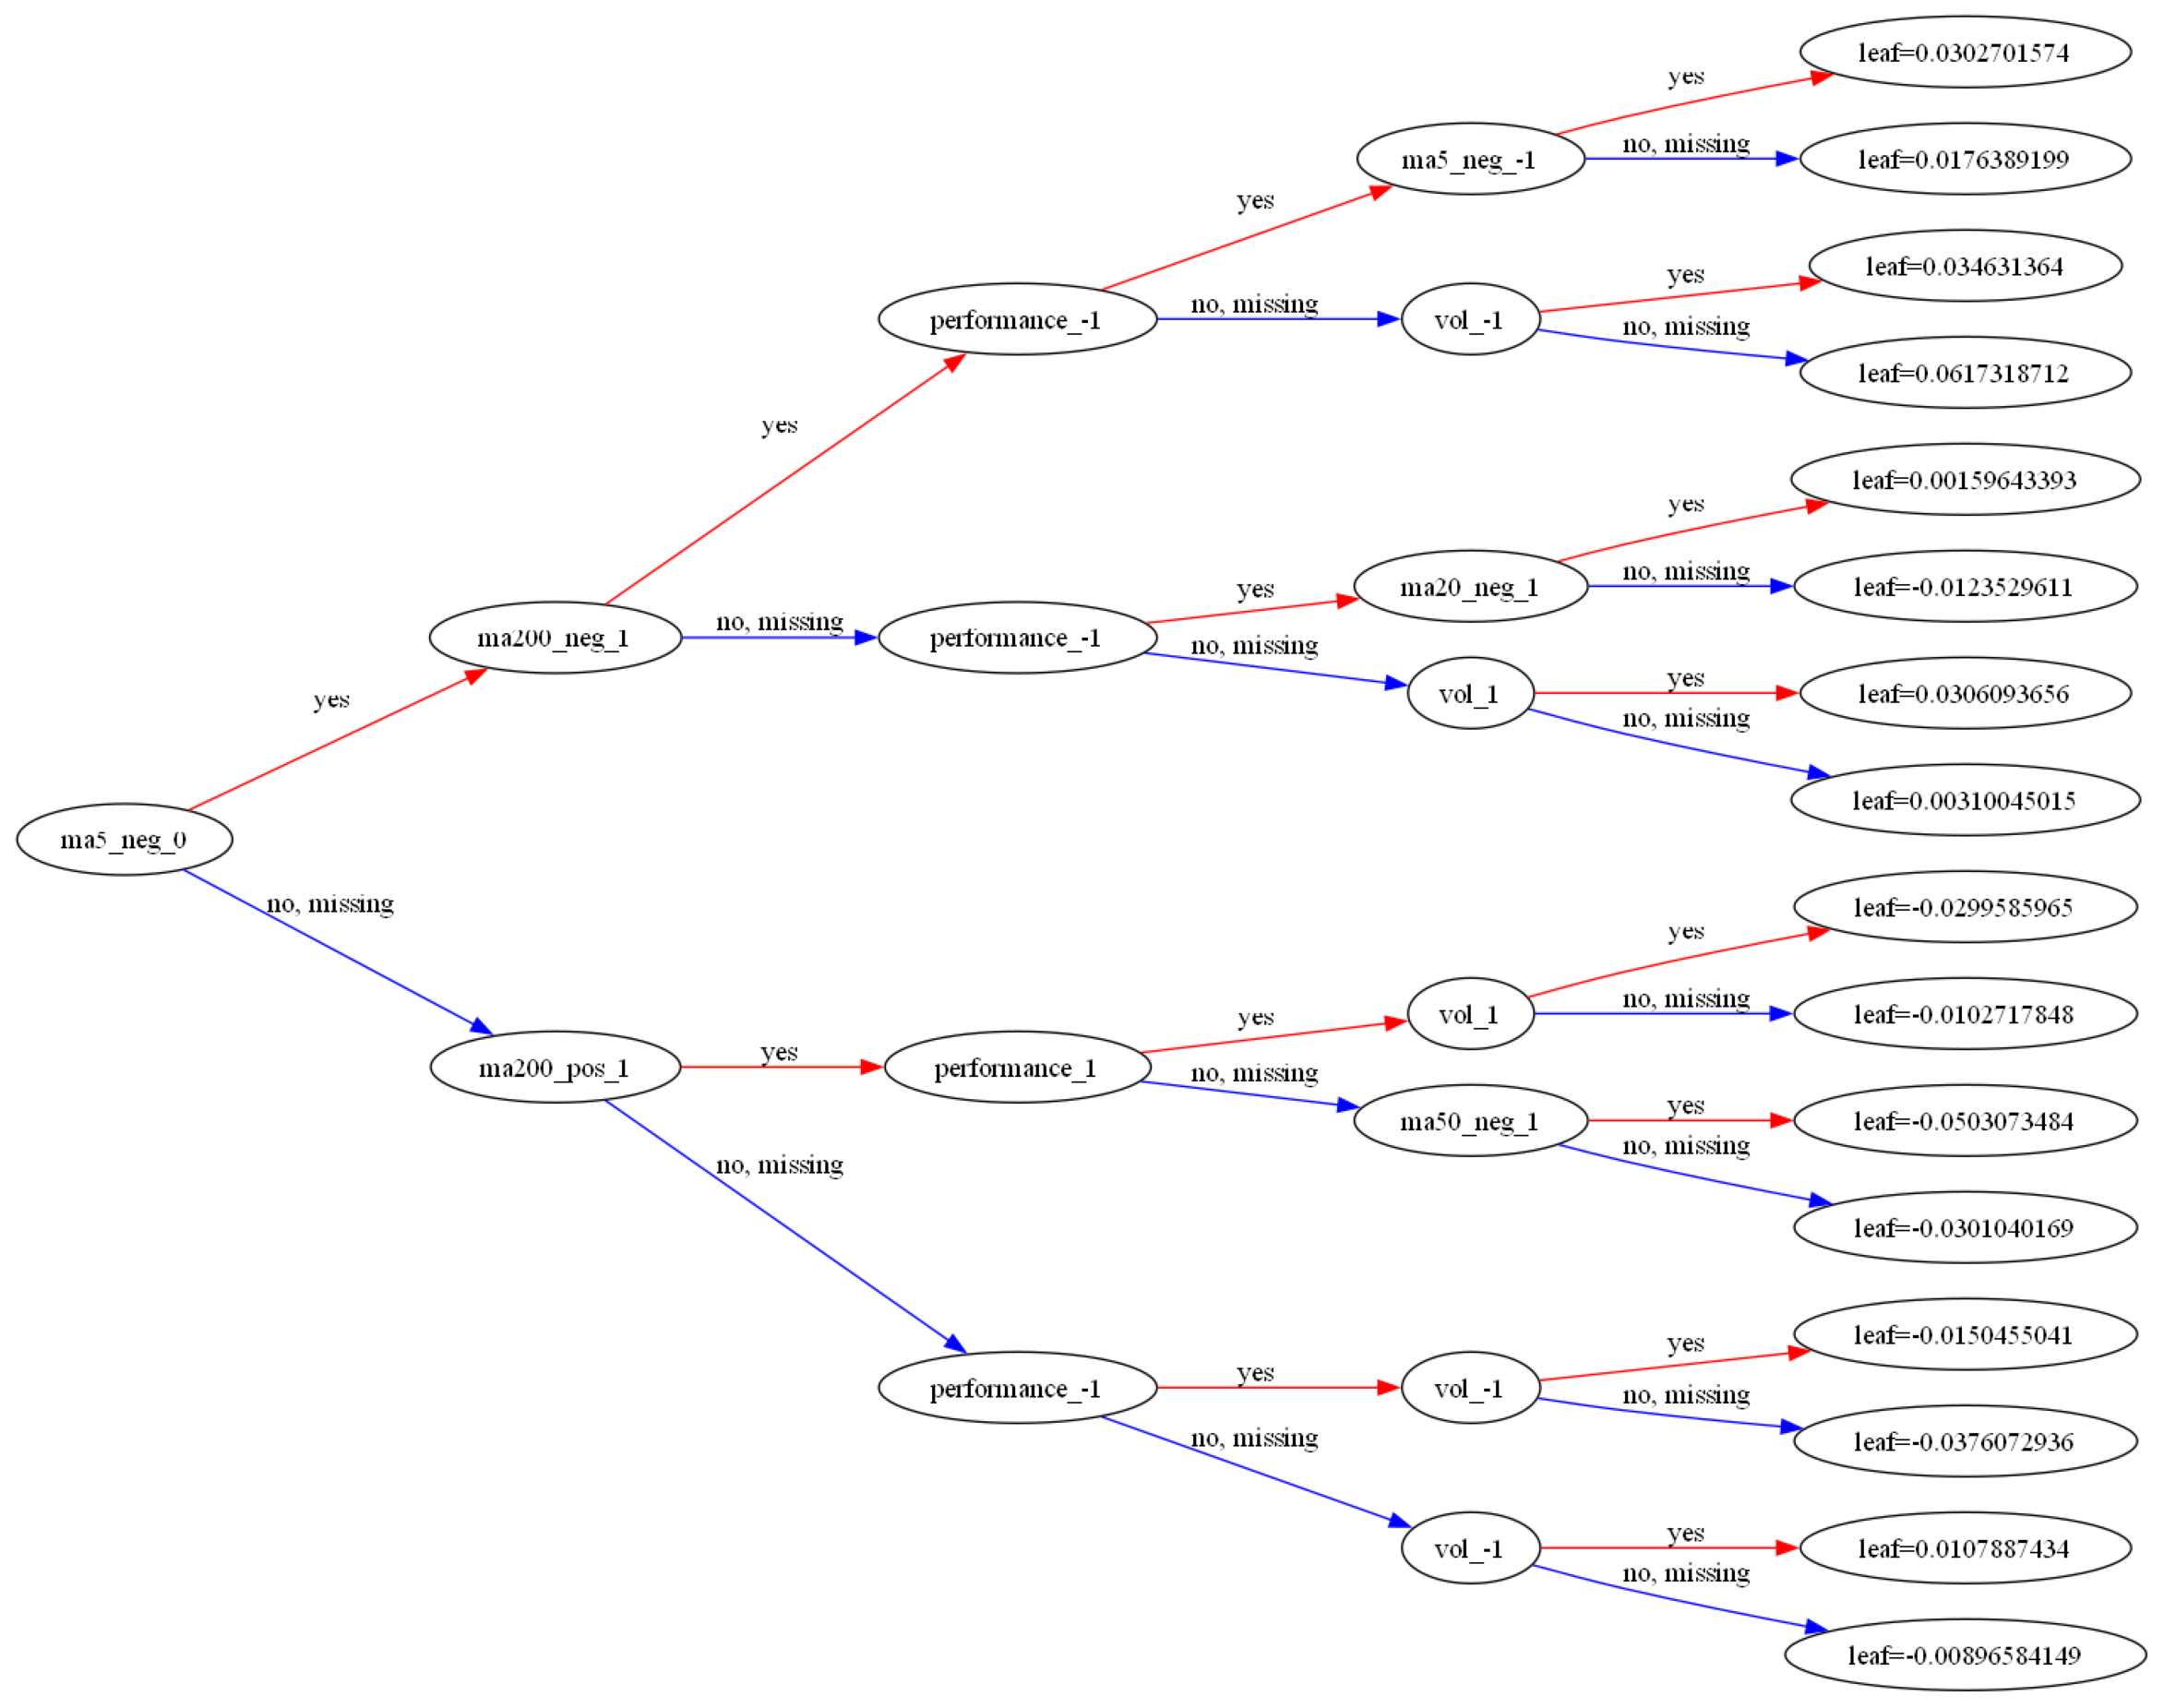

In [27]:
plot_tree(model, rankdir='LR');